# DAY 9 - TASK 1

<b> K-means Clustering </b>

Perform the following on the "driver dataset":
  -  Make a k-means clustering model by taking the number of centroid as 2
  -  Evaluate the coordinates of the centroids
  -  Plot the centroids along with their clustered groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("driver-data.csv")

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

Text(0, 0.5, 'mean_over_speed_perc')

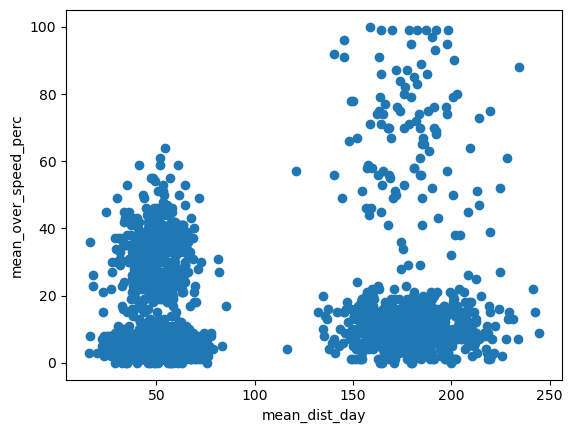

In [6]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

#### Applying K-means Clustering with centroid = 2 

In [7]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

C:\Users\CY595VA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

In [14]:
np.unique(y_predicted)

array([0, 1])

In [15]:
df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
3049,3423311519,30.16,5,0
3634,3423311895,205.07,15,1
972,3423310729,36.76,5,0
2704,3423312329,50.07,4,0
869,3423313111,61.79,5,0


#### Coordinates of the Centroid

In [16]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

#### Plotting the Scatter plot along with the centroids

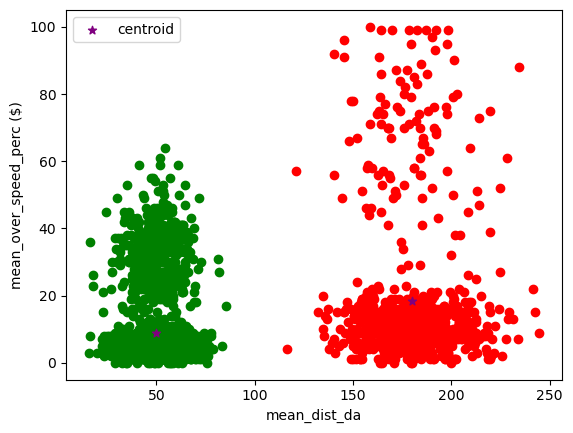

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()